In [159]:
#1: Logistic model with Few Features
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [160]:
#2:
data = pd.read_csv('/content/Titanic data.csv')

In [161]:
#3:
print("Missing values before cleaning:")
print(data[['Pclass', 'Sex', 'Age', 'Survived']].isna().sum())

Missing values before cleaning:
Pclass       0
Sex          0
Age         86
Survived     0
dtype: int64


In [162]:
#4:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [163]:
#5:
print("\nMissing values after cleaning:")
print(data[['Pclass', 'Sex', 'Age', 'Survived']].isna().sum())


Missing values after cleaning:
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64


In [164]:
#6:
data_cleaned = data[['Pclass', 'Sex', 'Age', 'Survived']].copy()

In [165]:
#7:
data_cleaned['Sex'] = data_cleaned['Sex'].replace({'male':0,'female':1})
print(data_cleaned['Sex'].head())


0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64


<ipython-input-165-aa14bf9598b2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['Sex'] = data_cleaned['Sex'].replace({'male':0,'female':1})


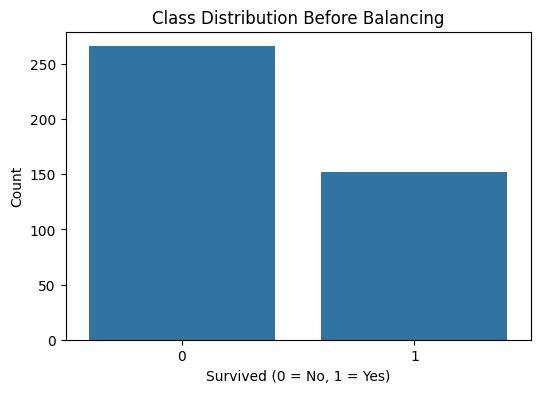

In [166]:
#8:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data_cleaned)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [167]:
#9:
features = ['Pclass', 'Sex', 'Age']
target = 'Survived'
X = data_cleaned[features]
y = data_cleaned[target]

In [168]:
#10:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [169]:
#11:
smote = SMOTE(random_state=10)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


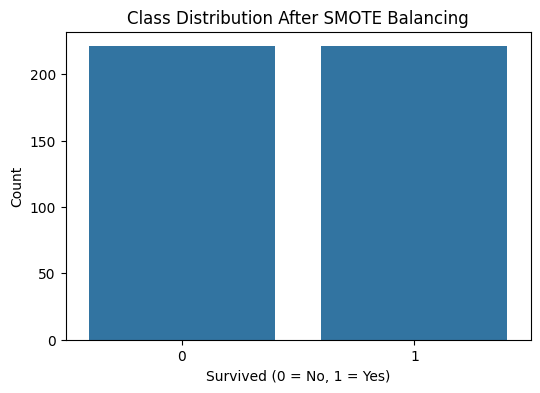

In [170]:
#12:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_balanced)
plt.title('Class Distribution After SMOTE Balancing')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [171]:
#13:
model = LogisticRegression(random_state=10)
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=10)

In [172]:
#14:
y_train_pred = model.predict(X_train_balanced)
y_test_pred = model.predict(X_test)

In [173]:
#15:
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train_balanced, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train_balanced, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train_balanced, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nLogistic Regression Performance (Balanced Data):")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")



Logistic Regression Performance (Balanced Data):
Training Accuracy: 1.0000
Test Accuracy: 1.0000
Training Precision: 1.0000
Test Precision: 1.0000
Training Recall: 1.0000
Test Recall: 1.0000
Training F1-Score: 1.0000
Test F1-Score: 1.0000


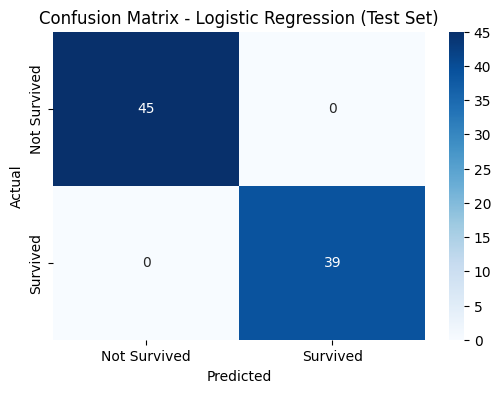

In [174]:
#16:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [175]:
#2: Decison Tree model with many Features:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [176]:
#1:
data = pd.read_csv('/content/Titanic data.csv')


In [177]:
#2:
data['FamilySize'] = data['SibSp'] + data['Parch']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','FamilySize']
target = 'Survived'
print("Missing values before cleaning:")
print(data[features + [target]].isna().sum())

Missing values before cleaning:
Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
FamilySize     0
Survived       0
dtype: int64


In [178]:
#3:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [179]:
#4:
print("\nMissing values after cleaning:")
print(data[features + [target]].isna().sum())


Missing values after cleaning:
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Survived      0
dtype: int64


In [180]:
#5:
data_cleaned = data[features + [target]].copy()

In [181]:
#6:
data_cleaned['Sex'] = data_cleaned['Sex'].replace({'male':0,'female':1})
print(data_cleaned['Sex'].head())
data_cleaned['Embarked'] = data_cleaned['Embarked'].replace({'S':0,'C':1,'Q':2})
print(data_cleaned['Embarked'].head())

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64
0    2
1    0
2    2
3    0
4    0
Name: Embarked, dtype: int64


<ipython-input-181-5af13076f930>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['Sex'] = data_cleaned['Sex'].replace({'male':0,'female':1})
<ipython-input-181-5af13076f930>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['Embarked'] = data_cleaned['Embarked'].replace({'S':0,'C':1,'Q':2})


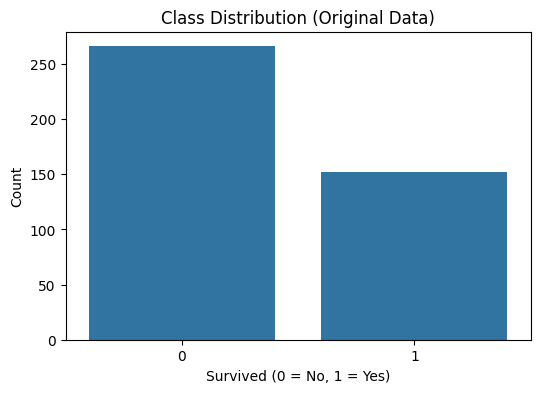

In [182]:
#7:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data_cleaned)
plt.title('Class Distribution (Original Data)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [183]:

#8:
X = data_cleaned[features]
y = data_cleaned[target]

In [184]:
#9:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
#10:
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [186]:
#11:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [187]:
#12:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nDecision Tree Performance (Overfitted Model, No SMOTE):")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


Decision Tree Performance (Overfitted Model, No SMOTE):
Training Accuracy: 1.0000
Test Accuracy: 1.0000
Training Precision: 1.0000
Test Precision: 1.0000
Training Recall: 1.0000
Test Recall: 1.0000
Training F1-Score: 1.0000
Test F1-Score: 1.0000


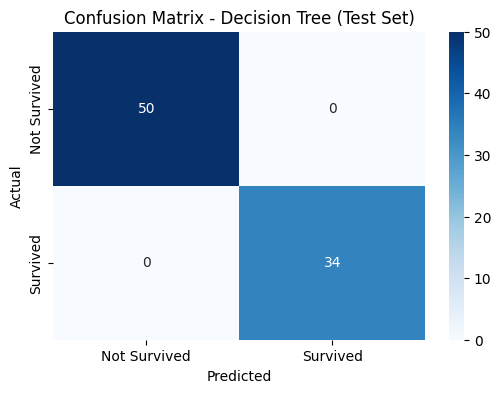

In [188]:
#13:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Decision Tree (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()